In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, t

## T-Test - Two Independent Samples
- Created by: **Bahy Helmi Hartoyo Putra**
- Source: **Statistics for the Behavioral Sciences Ninth (9th) Edition by Frederick J. Gravetter and Larry B. Wallnau**

### Objective(s)
- Evaluate mean differences of **Mid Term Score** between two different **learning style** in a school.
- The two different treatments (learning styles) done are:
    - **Experiment-Based Learning**
    - **Reading-Based Learning**
- Define wether mean difference is **significant**.

### Load Dataset

In [2]:
# Dummy dataset with n=10
dataset = pd.DataFrame({"experiment-based": [86, 87, 91, 97, 98, 99, 97, 94, 89, 92],
                        "reading-based": [90, 89, 82, 83, 85, 79, 83, 86, 81, 92]})

In [3]:
dataset.head()

,experiment-based,reading-based
0,86,90
1,87,89
2,91,82
3,97,83
4,98,85


### #1: Define Hypothesis

μ1 = Experiment-based population mean
<br>
μ2 = Reading-based population mean
<br>
H<sub>0</sub>: μ1 - μ2 = 0
<br>
H<sub>1</sub>: μ1 - μ2 ≠ 0
<br>

### #2: Find Critical Region

In [4]:
# Pre-requisites parameter
alpha_level = 0.01
df1 = len(dataset['experiment-based']) - 1
df2 = len(dataset['reading-based']) - 1
df = df1 + df2

In [5]:
# Locate the t-statistic critical region, two-tail
t_stats = round(t.ppf(1-(alpha_level/2), df), 3)
t_stats

2.878

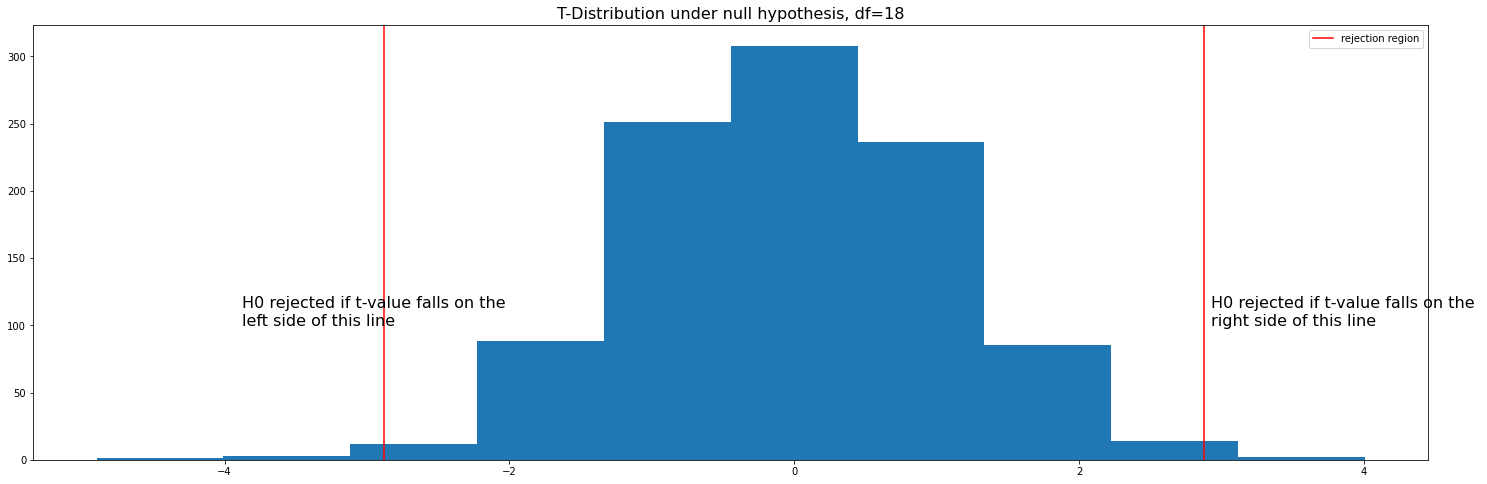

In [6]:
# Locate the rejection region
t_distribution = t.rvs(df, size=1000)

plt.figure(figsize=(25,8))

plt.hist(t_distribution)
plt.axvline(t_stats, c='red', label='rejection region')
plt.axvline(t_stats-(2*t_stats), c='red')

plt.text(t_stats+0.05, y=100, s="H0 rejected if t-value falls on the \nright side of this line", fontsize=16)
plt.text(t_stats-(2*t_stats)-1, y=100, s="H0 rejected if t-value falls on the \nleft side of this line", fontsize=16)

plt.title("T-Distribution under null hypothesis, df=18", fontsize=16)
plt.legend()
plt.show()

### #3: Calculate t-value

In [7]:
# Calculate t_value
t_value, p_value = ttest_ind(dataset['experiment-based'], dataset['reading-based'])

In [8]:
t_value, p_value

(4.0, 0.00083982931740856)

### #4: Locate t-value

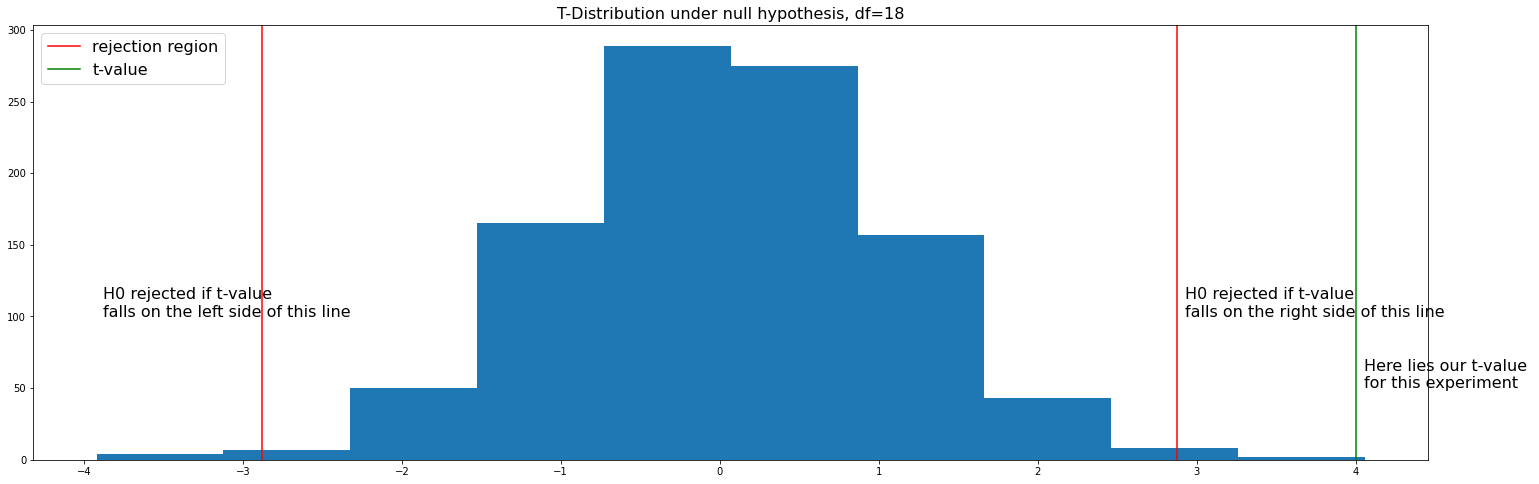

In [12]:
# Locate the rejection region
t_distribution = t.rvs(df, size=1000)

plt.figure(figsize=(25,8))

plt.hist(t_distribution)
plt.axvline(t_stats, c='red', label='rejection region')
plt.axvline(t_stats-(2*t_stats), c='red')
plt.axvline(t_value, c='green', label='t-value')

plt.text(t_stats+0.05, y=100, s="H0 rejected if t-value \nfalls on the right side of this line", fontsize=16)
plt.text(t_stats-(2*t_stats)-1, y=100, s="H0 rejected if t-value \nfalls on the left side of this line", fontsize=16)
plt.text(t_value+0.05, y=50, s="Here lies our t-value \nfor this experiment", fontsize=16)

plt.title("T-Distribution under null hypothesis, df=18", fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

### #5: Calculate Effect Size (Cohen's d)

In [22]:
def sum_of_squares(arr):
    mean_arr = np.mean(arr)
    ss = np.sum([np.square(x - mean_arr) for x in arr])
    
    return ss

# Sample mean of Experiment-based & Reading-based learning
m1 = dataset['experiment-based'].mean()
m2 = dataset['reading-based'].mean()

ss1 = sum_of_squares(dataset['experiment-based'])
ss2 = sum_of_squares(dataset['reading-based'])

# Cohen's d formula for t-test ind_sample
estimated_mean_difference = m1 - m2
estimated_standard_deviation = np.sqrt((ss1 + ss2)/(df1 + df2))

d = estimated_mean_difference / estimated_standard_deviation
round(d, 2)

1.79

### #6: Conclude Result

The students who study using **experiment-based learning** had higher high school grades **(M=93, SD=4.71)** than the students who study using **reading-based learning (M=85, SD=4.22)**. The **mean difference was significant, t(18)=4.00, p<0.01, d=1.79**.